In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d sdaiancai/sada2022 -f train.csv -p ./sada
!kaggle datasets download -d sdaiancai/sada2022 -f test.csv -p ./sada
!kaggle datasets download -d sdaiancai/sada2022 -f valid.csv -p ./sada

In [11]:
!unzip ./sada/train.csv.zip -d ./sada
!unzip ./sada/test.csv.zip -d ./sada
!unzip ./sada/valid.csv.zip -d ./sada

Archive:  ./sada/train.csv.zip
  inflating: ./sada/train.csv        
Archive:  ./sada/test.csv.zip
  inflating: ./sada/test.csv         
Archive:  ./sada/valid.csv.zip
  inflating: ./sada/valid.csv        


In [12]:
!rm ./sada/*.zip

In [13]:
train_df = pd.read_csv('./sada/train.csv')
train_df.head()

,Unnamed: 0,FileName,ShowName,FullFileLength,SegmentID,SegmentLength,SegmentStart,SegmentEnd,SpeakerAge,SpeakerGender,SpeakerDialect,Speaker,Environment,GroundTruthText,ProcessedText,Category
0,0,batch_1/6k_SBA_100_0.wav,الجفاف يقتل الندى,605.3,6k_SBA_100_0-seg_249_720-251_840,2.12,249.72,251.84,Elderly -- كبير في السن,Male,Najdi,Speaker1متحدث,Clean -- نظيف,ووضّح كلامك يا مغيث,ووضح كلامك يا مغيث,درامي
1,1,batch_1/6k_SBA_100_0.wav,الجفاف يقتل الندى,605.3,6k_SBA_100_0-seg_252_700-255_300,2.60,252.70,255.30,Elderly -- كبير في السن,Male,Najdi,Speaker1متحدث,Clean -- نظيف,ترى رأسي ما عاد يتحمّل ألغازك.,ترى راسي ما عاد يتحمل الغازك,درامي
2,2,batch_1/6k_SBA_100_0.wav,الجفاف يقتل الندى,605.3,6k_SBA_100_0-seg_256_010-258_180,2.17,256.01,258.18,Elderly -- كبير في السن,Male,Najdi,Speaker2متحدث,Clean -- نظيف,سلامة رأسك يا أبو مسامح.,سلامة راسك يا ابو مسامح,درامي
3,3,batch_1/6k_SBA_100_0.wav,الجفاف يقتل الندى,605.3,6k_SBA_100_0-seg_259_560-263_060,3.50,259.56,263.06,Elderly -- كبير في السن,Male,Najdi,Speaker2متحدث,Music -- موسيقى,ما يصير يا أبو مسامح تخلّي البنت في البيت دون ...,ما يصير يا ابو مسامح تخلي البنت في البيت دون امها,درامي
4,4,batch_1/6k_SBA_100_0.wav,الجفاف يقتل الندى,605.3,6k_SBA_100_0-seg_268_150-273_700,5.55,268.15,273.70,Elderly -- كبير في السن,Male,Najdi,Speaker1متحدث,Clean -- نظيف,ويش فيها لقعدت في البيت دون أمها ما هو ده بيت ...,ويش فيها لقعدت في البيت دون امها ما هو ده بيت ...,درامي


In [21]:
train_df.shape

(241834, 16)

## Speacker Dialect
Values we need:
- Najdi
- Hejazi
- Khaliji
- ModernStandardArabic

In [15]:
train_df['SpeakerDialect'].unique() 

array(['Najdi', 'More than 1 speaker اكثر من متحدث', 'Unknown', 'Khaliji',
       'Hijazi', 'ModernStandardArabic', 'Notapplicable', 'Egyptian',
       'Levantine', 'Yemeni', 'Maghrebi', 'Janubi', 'Shamali', 'Iraqi'],
      dtype=object)

## Columns we don't need
- FileName
- FullFileLength
- SegmentID
- SegmentLength
- SegmentStart
- SegmentEnd

In [16]:
## Columns of the dataset
train_df.columns

Index(['Unnamed: 0', 'FileName', 'ShowName', 'FullFileLength', 'SegmentID',
       'SegmentLength', 'SegmentStart', 'SegmentEnd', 'SpeakerAge',
       'SpeakerGender', 'SpeakerDialect', 'Speaker', 'Environment',
       'GroundTruthText', 'ProcessedText', 'Category'],
      dtype='object')

## Preprocessing steps

In [22]:
dialects_to_keep = ['Najdi', 'Hejazi', 'Khaliji', 'ModernStandardArabic']
filtered_df = train_df[train_df['SpeakerDialect'].isin(dialects_to_keep)]

columns_to_remove = ['FileName', 'FullFileLength', 'SegmentID', 'SegmentLength', 'SegmentStart', 'SegmentEnd']
processed_df = filtered_df.drop(columns=columns_to_remove)

In [25]:
train_df.shape,processed_df.shape

((241834, 16), (123239, 10))

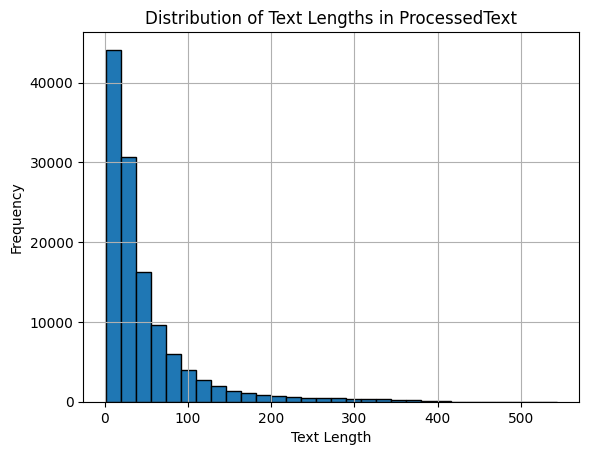

In [27]:
processed_df['text_length'] = processed_df['ProcessedText'].str.len()
processed_df['text_length'].hist(bins=30, edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths in ProcessedText')
plt.show()

In [31]:
processed_df['ProcessedText'][:15]

0                                    ووضح كلامك يا مغيث
1                          ترى راسي ما عاد يتحمل الغازك
2                               سلامة راسك يا ابو مسامح
3     ما يصير يا ابو مسامح تخلي البنت في البيت دون امها
4     ويش فيها لقعدت في البيت دون امها ما هو ده بيت ...
5             الا بيت ابوها لكن لا تنسى انك حطمت حياتها
6              يبغى انسى انت منين تجيبلي هالكلام الفاضي
7                                            ما هو فاضي
8                            طردت امها و طردت اخوها زيد
9     واذا قعدت في البيت في خطر عليك ولا يصير تخليها...
10                                         زين وش اسوات
11           بغات تنحبس ولا طقاقن يطق راسها ان شاء الله
12                             هذا مو كلام يا ابو مسامح
13                    اقولك بقائها في البيت في خطر عليك
14                                  ق ق قلي وش هو الخطر
Name: ProcessedText, dtype: object

In [32]:
# export the processed data
processed_df.to_csv('./sada/processed_train.csv', index=False)

In [4]:
sada_df = pd.read_csv('./sada/processed_train.csv')

In [17]:
sada_df.tail(20)

,Unnamed: 0,ShowName,SpeakerAge,SpeakerGender,SpeakerDialect,Speaker,Environment,GroundTruthText,ProcessedText,Category,text_length
123219,241812,حالتنا حالة,Adult -- بالغ,Female,Najdi,Speaker1متحدث,Music -- موسيقى,نعم أنا زوجت الرجال، أنا زوجت زوجي الله ياخذك ...,نعم انا زوجت الرجال انا زوجت زوجي الله ياخذك س...,كوميدي,56.0
123220,241813,حالتنا حالة,Adult -- بالغ,Female,Najdi,Speaker1متحدث,Music -- موسيقى,سلطان سلطان سلطان. أنا ما مت يا سلطان سلطان,سلطان سلطان سلطان انا ما مت يا سلطان سلطان,كوميدي,42.0
123221,241814,حالتنا حالة,Adult -- بالغ,Female,Najdi,Speaker1متحدث,Music -- موسيقى,طلقهم يا سلطان,طلقهم يا سلطان,كوميدي,14.0
123222,241815,حالتنا حالة,Adult -- بالغ,Male,Najdi,Speaker2متحدث,Noisy -- ضوضاء,لا ماني مطلقهم بعدين الطلاق ما هو لعبة أنا ما ...,لا ماني مطلقهم بعدين الطلاق ما هو لعبة انا ما ...,كوميدي,82.0
123223,241816,حالتنا حالة,Adult -- بالغ,Female,Najdi,Speaker5متحدث,Noisy -- ضوضاء,برجي الخزان.,برجي الخزان,كوميدي,11.0
123224,241817,حالتنا حالة,Adult -- بالغ,Male,Najdi,Speaker2متحدث,Noisy -- ضوضاء,الخزان وإنتي؟,الخزان وانتي,كوميدي,12.0
123225,241819,حالتنا حالة,Adult -- بالغ,Male,Najdi,Speaker2متحدث,Music -- موسيقى,كهرب قلبي,كهرب قلبي,كوميدي,9.0
123226,241820,حالتنا حالة,Adult -- بالغ,Female,Najdi,Speaker1متحدث,Noisy -- ضوضاء,يعني منت مطلق؟,يعني منت مطلق,كوميدي,13.0
123227,241821,حالتنا حالة,Adult -- بالغ,Male,Najdi,Speaker2متحدث,Music -- موسيقى,ماني مطلق,ماني مطلق,كوميدي,9.0
123228,241822,حالتنا حالة,Adult -- بالغ,Female,Najdi,Speaker1متحدث,Music -- موسيقى,طيب.,طيب,كوميدي,3.0


In [7]:
sample = sada_df.sample(5)

In [13]:
sample

,Unnamed: 0,ShowName,SpeakerAge,SpeakerGender,SpeakerDialect,Speaker,Environment,GroundTruthText,ProcessedText,Category,text_length
45944,79453,العبقري الصغير,Adult -- بالغ,Male,Najdi,Speaker1متحدث,Music -- موسيقى,صح. صح صح صح. نجحتي في التحدي عشرة من عشرة وإن...,صح صح صح صح نجحتي في التحدي عشرة من عشرة وانتي...,اطفال,97.0
106828,201113,خزنة,Adult -- بالغ,Female,Khaliji,Speaker2متحدث,Clean -- نظيف,صدق يا يوما خل خليفة أخوك يروح معاك ها وبالمرة...,صدق يا يوما خل خليفة اخوك يروح معاك ها وبالمرة...,كوميدي,63.0
44576,77452,سباق المشاهدين,Adult -- بالغ,Male,Najdi,Speaker3متحدث,Noisy -- ضوضاء,أقول صح إن شاء الله.,اقول صح ان شاء الله,مسابقات,19.0
109647,209380,حكايات بابا فرحان,Adult -- بالغ,Male,Khaliji,Speaker6متحدث,Clean -- نظيف,وأنا كلها نخلص عليه,وانا كلها نخلص عليه,اطفال,19.0
53451,90107,ضحى مع القصار,Adult -- بالغ,Male,Khaliji,Speaker2متحدث,Noisy -- ضوضاء,وحتى إذا فتحتوه خلي يمكم فوطة أو قطعة قماش رطب...,وحتى اذا فتحتوه خلي يمكم فوطة او قطعة قماش رطب...,طبخ,115.0


# Data Preprocessing

In [26]:
dialect_tokens = {
    'Najdi': '<|Najdi|>',
    'Hejazi': '<|Hejazi|>',
    'Khaliji': '<|Khaliji|>',
    'ModernStandardArabic': '<|MSA|>'
}

In [24]:
sada_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123239 entries, 0 to 123238
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       123239 non-null  int64  
 1   ShowName         123239 non-null  object 
 2   SpeakerAge       123239 non-null  object 
 3   SpeakerGender    123239 non-null  object 
 4   SpeakerDialect   123239 non-null  object 
 5   Speaker          123239 non-null  object 
 6   Environment      123239 non-null  object 
 7   GroundTruthText  123239 non-null  object 
 8   ProcessedText    123222 non-null  object 
 9   Category         123239 non-null  object 
 10  text_length      123222 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 10.3+ MB


In [39]:
# copy of the dataframe (just 1000 rows)
processed_df = sada_df.copy()

In [40]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123239 entries, 0 to 123238
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       123239 non-null  int64  
 1   ShowName         123239 non-null  object 
 2   SpeakerAge       123239 non-null  object 
 3   SpeakerGender    123239 non-null  object 
 4   SpeakerDialect   123239 non-null  object 
 5   Speaker          123239 non-null  object 
 6   Environment      123239 non-null  object 
 7   GroundTruthText  123239 non-null  object 
 8   ProcessedText    123222 non-null  object 
 9   Category         123239 non-null  object 
 10  text_length      123222 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 10.3+ MB


In [36]:
processed_df.iloc[0]['Speaker'][:8]

'Speaker1'

In [41]:
processed_df['llm_text'] =  processed_df.apply(lambda row: f"{dialect_tokens[row['SpeakerDialect']]} {row['Speaker'][:8]}: {row['ProcessedText']}", axis=1)

In [42]:
processed_df['llm_text'].head()

0               <|Najdi|> Speaker1: ووضح كلامك يا مغيث
1     <|Najdi|> Speaker1: ترى راسي ما عاد يتحمل الغازك
2          <|Najdi|> Speaker2: سلامة راسك يا ابو مسامح
3    <|Najdi|> Speaker2: ما يصير يا ابو مسامح تخلي ...
4    <|Najdi|> Speaker1: ويش فيها لقعدت في البيت دو...
Name: llm_text, dtype: object

In [43]:
import json

with open('pretraining_data.jsonl', 'w', encoding='utf-8') as f:
    for text in processed_df['llm_text']:
        json.dump({"text": text}, f, ensure_ascii=False)
        f.write('\n')